# Adaboost from scratch 

In [624]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [689]:
df = pd.read_csv('sample1.csv')

In [690]:
df = df.iloc[0:10,:]
df

,X1,X2,label
0,12,100,1
1,4,200,1
2,5,150,0
3,8,160,0
4,9,120,0
5,17,210,1
6,15,155,1
7,3,144,0
8,1,136,0
9,25,120,0


In [691]:
df.shape

(10, 3)

In [692]:
df['label'].value_counts()

0    6
1    4
Name: label, dtype: int64

In [693]:
df['weights'] = 1/df.shape[0]

In [694]:
df.head()

,X1,X2,label,weights
0,12,100,1,0.1
1,4,200,1,0.1
2,5,150,0,0.1
3,8,160,0,0.1
4,9,120,0,0.1


In [695]:
X = df.drop('label',axis=1)
y = df.label

In [696]:
X.head()

,X1,X2,weights
0,12,100,0.1
1,4,200,0.1
2,5,150,0.1
3,8,160,0.1
4,9,120,0.1


In [697]:
stump1 = DecisionTreeClassifier(max_depth=1)

In [698]:
stump1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 180.0\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

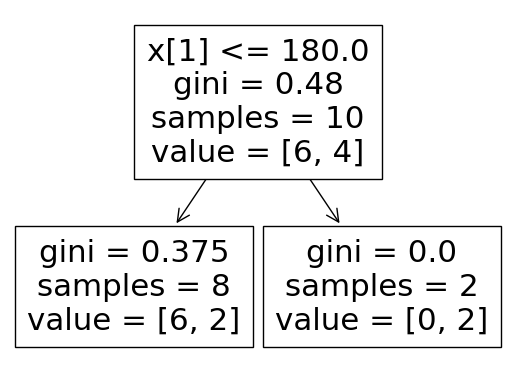

In [699]:
plot_tree(stump1)

In [700]:
df['y_pred'] = stump1.predict(X)

In [701]:
df

,X1,X2,label,weights,y_pred
0,12,100,1,0.1,0
1,4,200,1,0.1,1
2,5,150,0,0.1,0
3,8,160,0,0.1,0
4,9,120,0,0.1,0
5,17,210,1,0.1,1
6,15,155,1,0.1,0
7,3,144,0,0.1,0
8,1,136,0,0.1,0
9,25,120,0,0.1,0


In [702]:
#no. of rows which predicted incorrectly
not_equal = (df['label'] != df['y_pred']).sum()
not_equal

2

In [703]:
#error rate: 
error = 2*0.1
error

0.2

In [704]:
#function to cal. AOS
def AOS(error):
    return 0.5*np.log((1-error)/(error))

In [705]:
#Calculate AOS for stump1 
AOS1 = AOS(error)
AOS1

0.6931471805599453

In [706]:
# Update weight:
def update_weights(row,AOS = 0.6931471805599453 ):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-AOS)
    else:
        return row['weights']*np.exp(AOS)

In [707]:
df['updated_weights'] = df.apply(update_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,12,100,1,0.1,0,0.20
1,4,200,1,0.1,1,0.05
2,5,150,0,0.1,0,0.05
3,8,160,0,0.1,0,0.05
4,9,120,0,0.1,0,0.05
5,17,210,1,0.1,1,0.05
6,15,155,1,0.1,0,0.20
7,3,144,0,0.1,0,0.05
8,1,136,0,0.1,0,0.05
9,25,120,0,0.1,0,0.05


In [708]:
df['updated_weights'].value_counts()

0.05    8
0.20    2
Name: updated_weights, dtype: int64

In [709]:
df['updated_weights'].sum()

0.8

In [710]:
df['normalised_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [711]:
df.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
0,12,100,1,0.1,0,0.20,0.2500
1,4,200,1,0.1,1,0.05,0.0625
2,5,150,0,0.1,0,0.05,0.0625
3,8,160,0,0.1,0,0.05,0.0625
4,9,120,0,0.1,0,0.05,0.0625


In [712]:
df['normalised_weights'].sum()

1.0

In [713]:
df['UB'] = np.cumsum(df['normalised_weights'])

In [714]:
df['LB'] = df['UB']-df['normalised_weights']

In [715]:
df.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,UB,LB
0,12,100,1,0.1,0,0.20,0.2500,0.2500,0.0000
1,4,200,1,0.1,1,0.05,0.0625,0.3125,0.2500
2,5,150,0,0.1,0,0.05,0.0625,0.3750,0.3125
3,8,160,0,0.1,0,0.05,0.0625,0.4375,0.3750
4,9,120,0,0.1,0,0.05,0.0625,0.5000,0.4375


In [716]:
df.shape

(10, 9)

In [717]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['UB'] > a and a > row['LB']:
                indices.append(index)
    return indices   

In [718]:
index_values = create_new_dataset(df)

index_values

[8, 1, 6, 6, 2, 5, 3, 8, 2, 0]

In [719]:
df2 = df.iloc[index_values,[0,1,2,3]]

In [720]:
df2

,X1,X2,label,weights
8,1,136,0,0.1
1,4,200,1,0.1
6,15,155,1,0.1
6,15,155,1,0.1
2,5,150,0,0.1
5,17,210,1,0.1
3,8,160,0,0.1
8,1,136,0,0.1
2,5,150,0,0.1
0,12,100,1,0.1


In [721]:
##    stump2

In [722]:
stump2 = DecisionTreeClassifier(max_depth=1)

In [723]:
X = df2.iloc[:,0:2].values
y = df2.iloc[:,2].values

In [724]:
stump2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 10.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

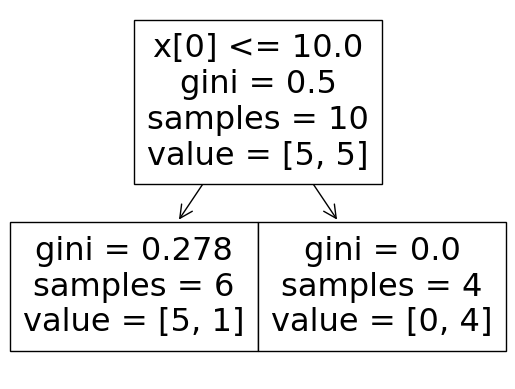

In [725]:
plot_tree(stump2)

In [726]:
df2['y_pred'] = stump2.predict(X)

In [727]:
df2

,X1,X2,label,weights,y_pred
8,1,136,0,0.1,0
1,4,200,1,0.1,0
6,15,155,1,0.1,1
6,15,155,1,0.1,1
2,5,150,0,0.1,0
5,17,210,1,0.1,1
3,8,160,0,0.1,0
8,1,136,0,0.1,0
2,5,150,0,0.1,0
0,12,100,1,0.1,1


In [728]:
#no. of rows which predicted incorrectly
not_equal = (df2['label'] != df2['y_pred']).sum()
not_equal

1

In [729]:
#error rate: 
error = 1*0.1
error

0.1

In [730]:
#function to cal. AOS
def AOS(error):
    return 0.5*np.log((1-error)/(error))

In [731]:
#Calculate AOS for stump1 
AOS2 = AOS(error)
AOS2

1.0986122886681098

In [732]:
# Update weight:
def update_weights(row,AOS = 1.0986122886681098 ):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-AOS)
    else:
        return row['weights']*np.exp(AOS)

In [733]:
df2['updated_weights'] = df2.apply(update_weights,axis=1)
df2

,X1,X2,label,weights,y_pred,updated_weights
8,1,136,0,0.1,0,0.033333
1,4,200,1,0.1,0,0.300000
6,15,155,1,0.1,1,0.033333
6,15,155,1,0.1,1,0.033333
2,5,150,0,0.1,0,0.033333
5,17,210,1,0.1,1,0.033333
3,8,160,0,0.1,0,0.033333
8,1,136,0,0.1,0,0.033333
2,5,150,0,0.1,0,0.033333
0,12,100,1,0.1,1,0.033333


In [734]:
df2['updated_weights'].value_counts()

0.033333    9
0.300000    1
Name: updated_weights, dtype: int64

In [735]:
df2['updated_weights'].sum()

0.6

In [736]:
df2['normalised_weights'] = df2['updated_weights']/df2['updated_weights'].sum()

In [737]:
df2.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
8,1,136,0,0.1,0,0.033333,0.055556
1,4,200,1,0.1,0,0.300000,0.500000
6,15,155,1,0.1,1,0.033333,0.055556
6,15,155,1,0.1,1,0.033333,0.055556
2,5,150,0,0.1,0,0.033333,0.055556


In [738]:
df2['normalised_weights'].sum()

1.0000000000000002

In [739]:
df2['UB'] = np.cumsum(df2['normalised_weights'])

In [740]:
df2['LB'] = df2['UB']-df2['normalised_weights']

In [741]:
df2.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,UB,LB
8,1,136,0,0.1,0,0.033333,0.055556,0.055556,0.000000
1,4,200,1,0.1,0,0.300000,0.500000,0.555556,0.055556
6,15,155,1,0.1,1,0.033333,0.055556,0.611111,0.555556
6,15,155,1,0.1,1,0.033333,0.055556,0.666667,0.611111
2,5,150,0,0.1,0,0.033333,0.055556,0.722222,0.666667


In [742]:
def create_new_dataset(df2):
    indices = []
    for i in range(df2.shape[0]):
        a = np.random.random()
        for index,row in df2.iterrows():
            if row['UB'] > a and a > row['LB']:
                indices.append(index)
    return indices 

In [743]:
index_values = create_new_dataset(df2)

index_values

[1, 1, 2, 8, 8, 1, 1, 1, 1, 6]

In [744]:
df3 = df2.iloc[index_values,[0,1,2,3]]

In [745]:
df3

,X1,X2,label,weights
1,4,200,1,0.1
1,4,200,1,0.1
6,15,155,1,0.1
2,5,150,0,0.1
2,5,150,0,0.1
1,4,200,1,0.1
1,4,200,1,0.1
1,4,200,1,0.1
1,4,200,1,0.1
3,8,160,0,0.1


In [746]:
##   stump3

In [747]:
stump3 = DecisionTreeClassifier(max_depth=1)

In [748]:
X = df3.iloc[:,0:2].values
y = df3.iloc[:,2].values

In [749]:
stump3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 180.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

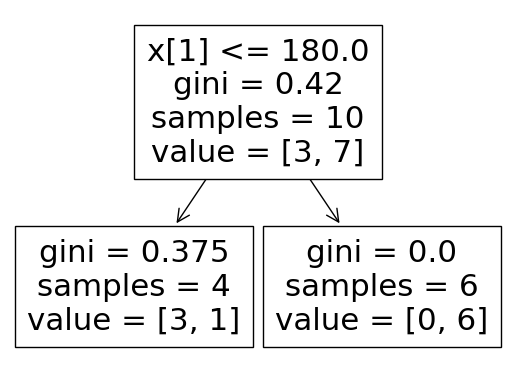

In [750]:
plot_tree(stump3)

In [770]:
df3['y_pred'] = stump3.predict(X)
df3

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,UB,LB
1,4,200,1,0.1,1,0.033333,0.055556,0.055556,0.000000
1,4,200,1,0.1,1,0.033333,0.055556,0.111111,0.055556
6,15,155,1,0.1,0,0.300000,0.500000,0.611111,0.111111
2,5,150,0,0.1,0,0.033333,0.055556,0.666667,0.611111
2,5,150,0,0.1,0,0.033333,0.055556,0.722222,0.666667
1,4,200,1,0.1,1,0.033333,0.055556,0.777778,0.722222
1,4,200,1,0.1,1,0.033333,0.055556,0.833333,0.777778
1,4,200,1,0.1,1,0.033333,0.055556,0.888889,0.833333
1,4,200,1,0.1,1,0.033333,0.055556,0.944444,0.888889
3,8,160,0,0.1,0,0.033333,0.055556,1.000000,0.944444


In [752]:
#no. of rows which predicted incorrectly
not_equal = (df3['label'] != df3['y_pred']).sum()
not_equal

1

In [753]:
#error rate: 
error = 1*0.1
error

0.1

In [754]:
#function to cal. AOS
def AOS(error):
    return 0.5*np.log((1-error)/(error))

In [755]:
#Calculate AOS for stump1 
AOS3 = AOS(error)
AOS3

1.0986122886681098

In [756]:
# Update weight:
def update_weights(row,AOS = 1.0986122886681098 ):
    if row['label'] == row['y_pred']:
        return row['weights']*np.exp(-AOS)
    else:
        return row['weights']*np.exp(AOS)

In [757]:
df3['updated_weights'] = df3.apply(update_weights,axis=1)
df3

,X1,X2,label,weights,y_pred,updated_weights
1,4,200,1,0.1,1,0.033333
1,4,200,1,0.1,1,0.033333
6,15,155,1,0.1,0,0.300000
2,5,150,0,0.1,0,0.033333
2,5,150,0,0.1,0,0.033333
1,4,200,1,0.1,1,0.033333
1,4,200,1,0.1,1,0.033333
1,4,200,1,0.1,1,0.033333
1,4,200,1,0.1,1,0.033333
3,8,160,0,0.1,0,0.033333


In [758]:
df3['updated_weights'].value_counts()

0.033333    9
0.300000    1
Name: updated_weights, dtype: int64

In [759]:
df3['updated_weights'].sum()

0.6

In [760]:
df3['normalised_weights'] = df3['updated_weights']/df3['updated_weights'].sum()

In [761]:
df3.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights
1,4,200,1,0.1,1,0.033333,0.055556
1,4,200,1,0.1,1,0.033333,0.055556
6,15,155,1,0.1,0,0.300000,0.500000
2,5,150,0,0.1,0,0.033333,0.055556
2,5,150,0,0.1,0,0.033333,0.055556


In [762]:
df3['normalised_weights'].sum()

1.0000000000000002

In [763]:
df3['UB'] = np.cumsum(df3['normalised_weights'])

In [764]:
df3['LB'] = df3['UB']-df3['normalised_weights']

In [765]:
df3.head()

,X1,X2,label,weights,y_pred,updated_weights,normalised_weights,UB,LB
1,4,200,1,0.1,1,0.033333,0.055556,0.055556,0.000000
1,4,200,1,0.1,1,0.033333,0.055556,0.111111,0.055556
6,15,155,1,0.1,0,0.300000,0.500000,0.611111,0.111111
2,5,150,0,0.1,0,0.033333,0.055556,0.666667,0.611111
2,5,150,0,0.1,0,0.033333,0.055556,0.722222,0.666667


In [766]:
def create_new_dataset(df3):
    indices = []
    for i in range(df3.shape[0]):
        a = np.random.random()
        for index,row in df3.iterrows():
            if row['UB'] > a and a > row['LB']:
                indices.append(index)
    return indices 

In [767]:
index_values = create_new_dataset(df3)

index_values

[6, 1, 1, 6, 3, 3, 1, 6, 6, 2]

In [768]:
df4 = df3.iloc[index_values,[0,1,2,3]]

In [769]:
df4

,X1,X2,label,weights
1,4,200,1,0.1
1,4,200,1,0.1
1,4,200,1,0.1
1,4,200,1,0.1
2,5,150,0,0.1
2,5,150,0,0.1
1,4,200,1,0.1
1,4,200,1,0.1
1,4,200,1,0.1
6,15,155,1,0.1


In [784]:
print(AOS1,AOS2,AOS3)

0.6931471805599453 1.0986122886681098 1.0986122886681098


In [786]:
df = pd.read_csv('sample1.csv')

In [787]:
df.head() 

,X1,X2,label
0,12,100,1
1,4,200,1
2,5,150,0
3,8,160,0
4,9,120,0


let X1 = 12 having y = 1
results:
- stump1: 0
- stump2: 1
- as AOS of stump2>stump1 So, y_pred will be 1 which is correct

let X1 = 15 having y = 1
results:
- stump1: 0
- stump2: 1
- stump3: 0
- as AOS of stump1+stump3>stump2 So, y_pred will be 0 which is incorrect 

let X1 = 4 having y = 1
results:
- stump1: 1
- stump2: 0
- stump3: 1
- as AOS of stump1+stump3>stump2 So, y_pred will be 1 which is correct 

In [ ]:
#so, adaboost scratch giving approx 90% accurate results

# sk learn method

In [772]:
from sklearn.ensemble import AdaBoostClassifier

In [773]:
abc = AdaBoostClassifier()

In [774]:
abc.fit(X,y)

AdaBoostClassifier()

In [780]:
y_pred = abc.predict(X)

In [781]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [782]:
y

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [783]:
#sklearn giving 100% accurate results